# [Lab Session 3](fourier.ipynb)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import resize

**[Task 1 (a).]()** Load the first image, resize it to (256, 256) and display it.


In [2]:
cell_img = plt.imread('data/cells.png')
cell_img_r = resize(cell_img, [256,256])

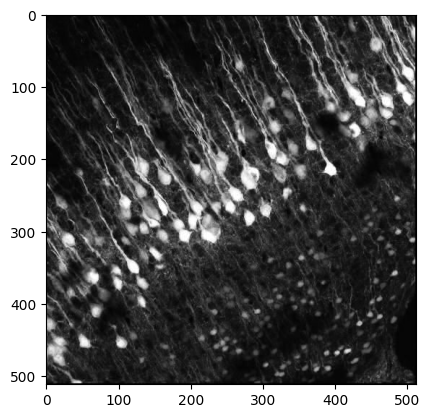

In [3]:
plt.imshow(cell_img, cmap='gray')

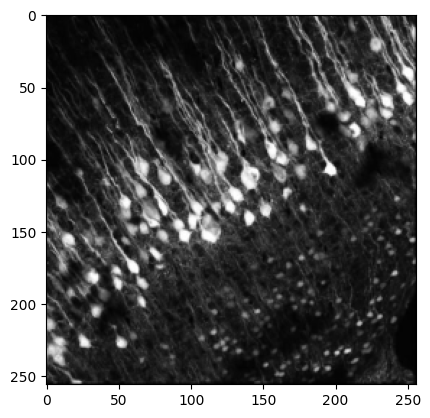

In [4]:
plt.imshow(cell_img_r, cmap='gray')

**[Task 1 (b).]()** Apply the fast Fourier transform and check the data type of the result.


In [5]:
cell_ft = np.fft.fft2(cell_img_r) # anwendung auf das veränderte bild, auf welches resize angewendet wurde
print(cell_ft.dtype)

complex128


**[Task 1 (c).]()** Extract the phase and amplitude and display them.


In [6]:
cell_amplitude = np.abs(cell_ft)
cell_phase = np.angle(cell_ft)

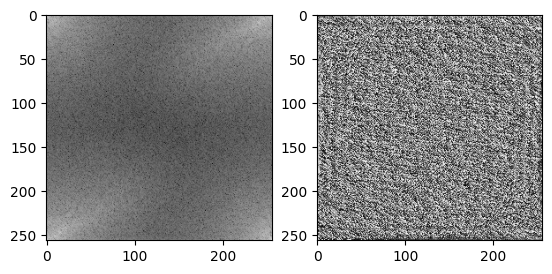

In [7]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(cell_amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(cell_phase, 'gray')

**[Task 1 (d).]()** Do a shift so that zero is displayed in the center of the image and show amplitude and phase again.


In [8]:
cell_ft_shift = np.fft.fftshift(cell_ft)

In [9]:
cell_amplitude_shift = np.abs(cell_ft_shift)
cell_phase_shift = np.angle(cell_ft_shift)

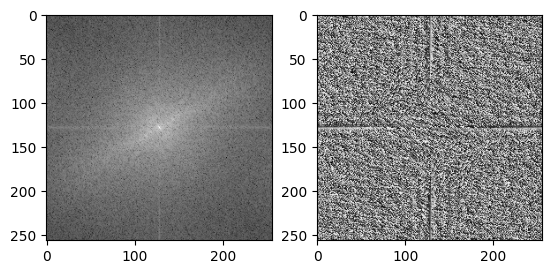

In [10]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(cell_amplitude_shift), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(cell_phase_shift, 'gray')

**[Task 1 (e).]()** Apply the inverse FFT and display the restored image.


In [11]:
np.fft.ifftshift(cell_ft_shift)
cell_ft_org = np.fft.ifft2(cell_ft_shift)
amplitude3 = np.abs(cell_ft_org)
phase3 = np.angle(cell_ft_org)

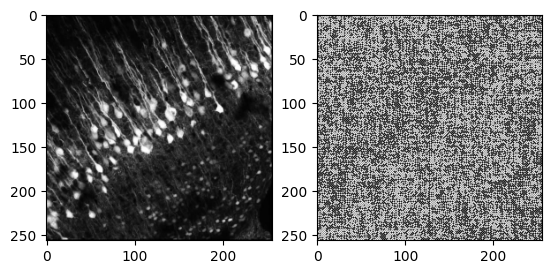

In [12]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(amplitude3, 'gray')
plt.subplot(1, 2, 2) 
plt.imshow(phase3, 'gray')

---


**[Task 2 (a).]()** Load the brain CT image.


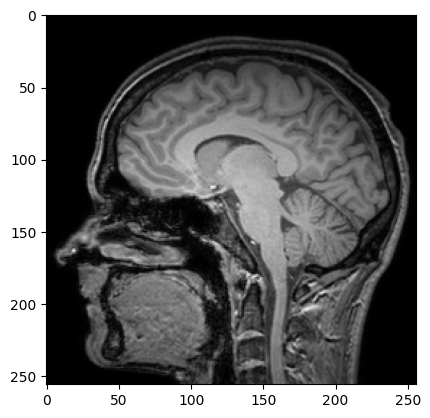

In [13]:
ct_img = plt.imread('data/brain_ct.png')
# Damit es unten Funktioniert brauchen beide bilder, das zellenbild und der ct scan die selbe dimension 
ct_img_r = resize(ct_img, [256,256])
plt.imshow(ct_img_r, cmap='gray')

**[Task 2 (b).]()** Apply the FFT, do a shift, extract amplitude and phase.


In [14]:
ct_fft = np.fft.fft2(ct_img_r) # Fast fourier Transform 
ct_fft_shift = np.fft.fftshift(ct_fft) # Shift 

# Extracting the Amplitude
brain_amplitude = np.abs(ct_fft)
brain_phase = np.angle(ct_fft)

# Extracting the shifted amplitudes 
brain_amplitude_shifted = np.abs(ct_fft_shift)
brain_phase_shifted = np.angle(ct_fft_shift)

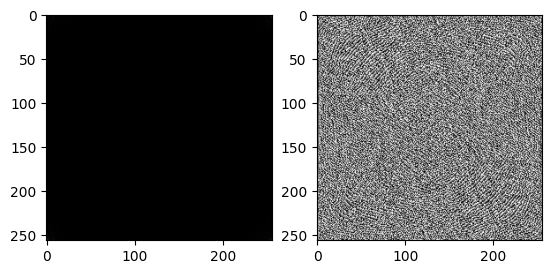

In [15]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(brain_amplitude, 'gray')
plt.subplot(1, 2, 2) 
plt.imshow(brain_phase, 'gray')

In [16]:
def to_complex_array(amplitude_array, phase_array):
    return amplitude_array * np.exp(1j * phase_array)

**[Task 2 (c).]()** Merge the amplitude of the brain CT and the phase of cell image. Do the IFFT and display the resulting image.


In [17]:
print(brain_amplitude.shape)
print(cell_phase.shape)

# Zur Anwendung der Funktion sollten die beiden die selbe Dimension haben 

(256, 256)
(256, 256)


In [18]:
merged_complex = to_complex_array(brain_amplitude, cell_phase)

In [19]:
# Reversing the shift IFFT
merged_image = np.fft.ifft2(merged_complex)
merged_image_real = np.abs(merged_image)

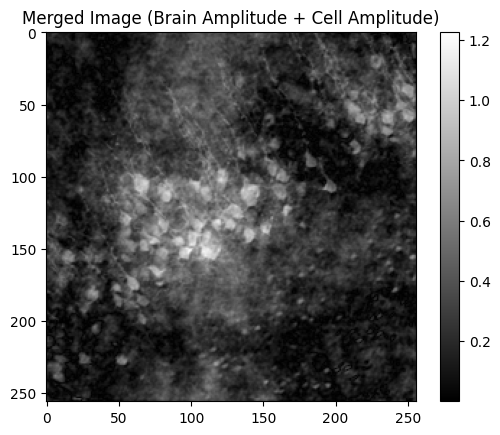

In [20]:
# Visualization 
plt.imshow(merged_image_real, cmap='gray')
plt.title('Merged Image (Brain Amplitude + Cell Amplitude)')
plt.colorbar()
plt.show()

**[Task 2 (d).]()** Repeat this with the amplitude of the cells and the phase of the brain.


In [21]:
merged_complex = to_complex_array(cell_amplitude, brain_phase)

In [22]:
# Reversing the shift IFFT
merged_image = np.fft.ifft2(merged_complex)
merged_image_real = np.abs(merged_image)

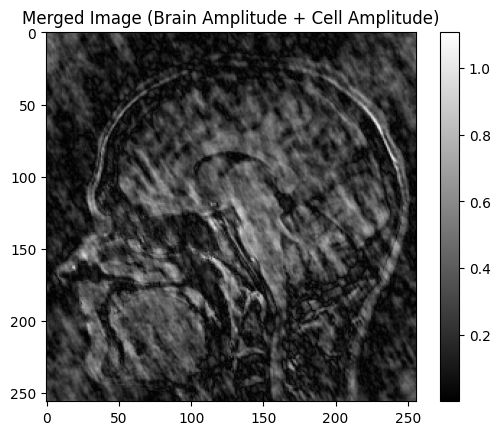

In [23]:
# Visualization 
plt.imshow(merged_image_real, cmap='gray')
plt.title('Merged Image (Brain Amplitude + Cell Amplitude)')
plt.colorbar()
plt.show()

---


**[Task 3 (a).]()** Create a lowpass filter mask.


In [24]:
image_size = (256, 256)
filter_window_size = 50

In [25]:
mask_low = np.zeros(image_size)

# Position des zentralen Rechtecks berechnen
center_x, center_y = image_size[0] // 2, image_size[1] // 2 # image_size[0]--> Zeilen; image_size[1] --> Spalten 
half_window = filter_window_size // 2

# Einsen im zentralen Rechteck setzen
mask_low[center_x - half_window:center_x + half_window,
     center_y - half_window:center_y + half_window] = 1

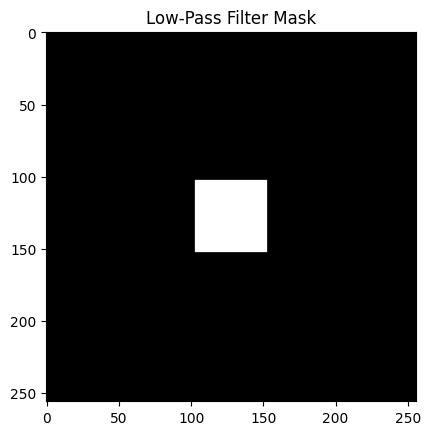

In [26]:
# Maske anzeigen
plt.imshow(mask_low, cmap='gray')
plt.title("Low-Pass Filter Mask")
plt.show()

**[Task 3 (b).]()** Create a highpass filter maks.


In [27]:
mask_high = np.ones(image_size) # mit einsen statt nullen für den highpass filter 

# Position des zentralen Rechtecks berechnen
center_x, center_y = image_size[0] // 2, image_size[1] // 2 # image_size[0]--> Zeilen; image_size[1] --> Spalten 
half_window = filter_window_size // 2

# Einsen im zentralen Rechteck setzen
mask_high[center_x - half_window:center_x + half_window,
     center_y - half_window:center_y + half_window] = 0 # war vorhin 1, aber wir wollen ja einen highpass filter

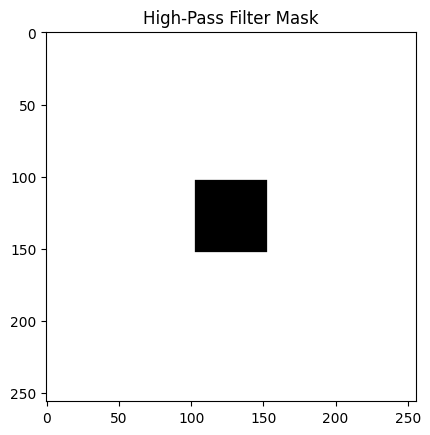

In [28]:
# Maske anzeigen
plt.imshow(mask_high, cmap='gray') # das selbe ergebnis würde rauskommen, wenn man hier einfach schreibe 1-mask
plt.title("High-Pass Filter Mask")
plt.show()

**[Task 3 (c).]()** Apply the lowpass and highpass filter mask to the amplitude of the brain and display the results.


In [29]:
# Extracting the shifted amplitudes 
brain_amplitude_shifted = np.abs(ct_fft_shift)

In [30]:
# Applying the lowpass filter
brain_low = mask_low * brain_amplitude_shifted 

# Applying the highpass filter 
brain_high = mask_high * brain_amplitude_shifted 

/tmp/ipykernel_41698/1936783772.py:7: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(brain_low))
/tmp/ipykernel_41698/1936783772.py:11: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(brain_high))  # Füge hier deine dritte Variable ein


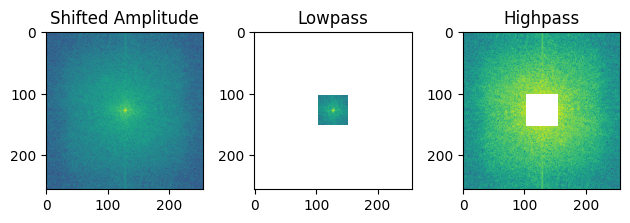

In [31]:
# Visualization of the 3 amplitudes
plt.subplot(1, 3, 1) 
plt.imshow(np.log(brain_amplitude_shifted))
plt.title("Shifted Amplitude")

plt.subplot(1, 3, 2) 
plt.imshow(np.log(brain_low))
plt.title("Lowpass")

plt.subplot(1, 3, 3)  
plt.imshow(np.log(brain_high))  # Füge hier deine dritte Variable ein
plt.title("Highpass")

plt.tight_layout()  
plt.show()

**[Task 3 (d).]()** Apply the mask to the amplitude, merge the result with the phase and restore the image.


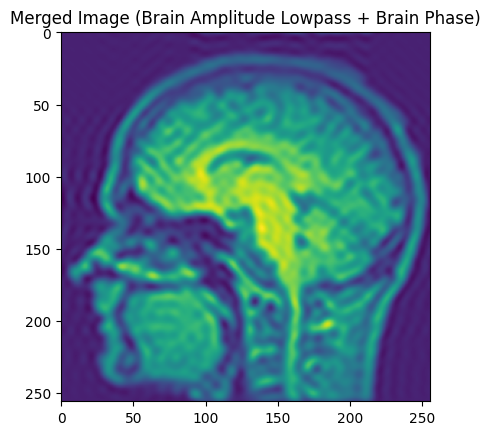

In [43]:
# Merging lowpass filtered amplitude with phase of brain image 
merged_complex_low = to_complex_array(brain_low, brain_phase_shifted)

# Reversing the shift IFFT
merged_complex_low_shift = np.fft.ifftshift(merged_complex_low)
merged_image = np.fft.ifft2(merged_complex_low_shift)

# Visualization 
plt.imshow(merged_image.real)
plt.title('Merged Image (Brain Amplitude Lowpass + Brain Phase)')
plt.show()

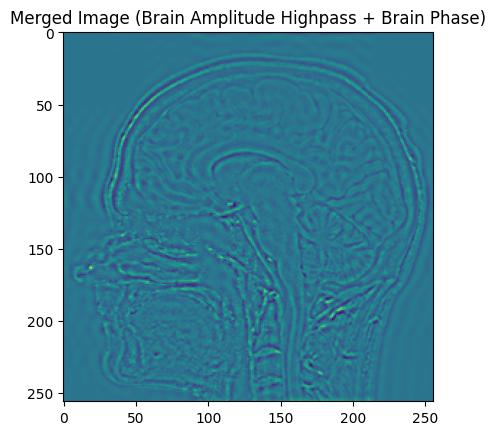

In [44]:
# Merging lowpass filtered amplitude with phase of brain image 
merged_complex_high = to_complex_array(brain_high, brain_phase_shifted)

# Reversing the shift IFFT
merged_complex_high_shift = np.fft.ifftshift(merged_complex_high)
merged_image = np.fft.ifft2(merged_complex_high_shift)

# Visualization 
plt.imshow(merged_image.real)
plt.title('Merged Image (Brain Amplitude Highpass + Brain Phase)')
plt.show()

---


**[Task 4 (a).]()** Implement a function that computes the 2D-DFT.


In [52]:
def compute_dft(img):
    # Extrahiere die Dimensionen des Bildes
    M, N = img.shape
    
    # Initialisiere ein leeres Array für das Ergebnis (mit komplexen Zahlen)
    dft = np.zeros((M, N), dtype=complex)
    
    # Berechnung der DFT
    for u in range(M):
        for v in range(N):
            # Berechnung der Summe gemäß der Formel
            sum_value = 0
            for x in range(M):
                for y in range(N):
                    exponent = -2j * np.pi * ((u * x / M) + (v * y / N))
                    sum_value += img[x, y] * np.exp(exponent)
            dft[u, v] = sum_value / (M * N)
    
    return dft

**[Task 4 (b).]()** Implement a function that computes the 2D-IDFT.


In [49]:
def compute_idft(dft_array):
    # Extrahiere die Dimensionen des DFT-Arrays
    M, N = dft_array.shape
    
    # Initialisiere ein leeres Array für das Ergebnis (mit komplexen Zahlen)
    idft = np.zeros((M, N), dtype=complex)
    
    # Berechnung der IDFT
    for x in range(M):
        for y in range(N):
            # Berechnung der Summe gemäß der Formel
            sum_value = 0
            for u in range(M):
                for v in range(N):
                    exponent = 2j * np.pi * ((u * x / M) + (v * y / N))
                    sum_value += dft_array[u, v] * np.exp(exponent)
            idft[x, y] = sum_value
    
    return idft

Due to high computational costs, we need to resize the image.


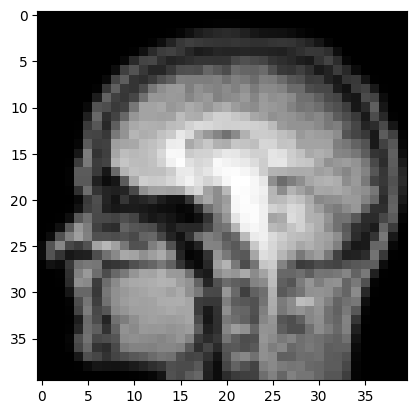

In [53]:
test_img = resize(ct_img, (40, 40))
plt.imshow(test_img, 'gray')

**[Task 4 (c).]()** Apply your DFT implementation to the image and display amplitude and phase.


In [ ]:
# Tetsing the implemented function 
dft_result = compute_dft(test_img)

amplitude = np.abs(dft_result)
phase = np.angle(dft_result)

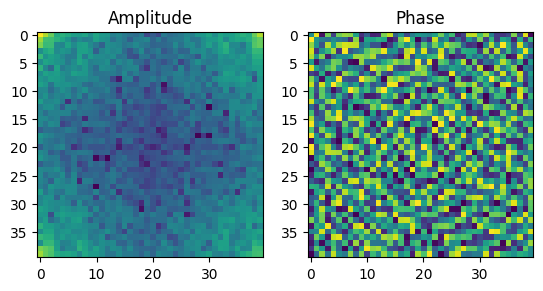

In [57]:
# Visualization 
# Amplitude visualisieren
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude))
plt.title("Amplitude")

# Phase visualisieren
plt.subplot(1, 2, 2)
plt.imshow(phase)
plt.title("Phase")

plt.show()

**[Task 4 (d).]()** Reconstruct the image using your IDFT implementation and display it.


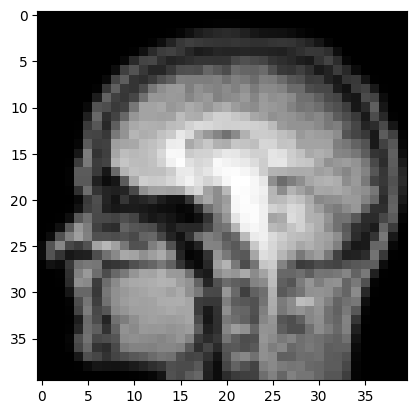

In [63]:
reconstruction = compute_idft(dft_result)
plt.imshow(reconstruction.real, cmap='gray')

**[Task 4 (e).]()** Compare your result to the result of numpy's FFT


In [69]:
compare = np.fft.fft2(test_img, norm='forward')
np.allclose(compare, dft_result)

True

**[Task 4 (f).]()** Round the arrays and compare them again.


In [76]:
dft_result = np.round(dft_result, 5)
compare = np.round(compare, 5)
(dft_result == compare).all()


True

In [77]:
np.mean(np.abs(dft_result - compare))

0.0

**[Task 4 (g).]()** Compare the run times of the two algorithms (your DFT and numpy's FFT)


In [78]:
%timeit np.fft.fft2(test_img, norm='forward')
%timeit compute_dft(test_img)

30.8 μs ± 2.43 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
4.52 s ± 31.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
